In [3]:
from transformers import BertTokenizer

In [4]:
!ls -l /data/suidianbo/Set_Rel/data/NYT/raw_NYT

total 55628
-rw-rw-r-- 1 suidianbo suidianbo  9177872 7月   5 22:51 raw_nyt.zip
-rw-rw-r-- 1 suidianbo suidianbo  3629325 11月 20  2019 raw_test.json
-rw-rw-r-- 1 suidianbo suidianbo 40524983 7月   9 16:22 raw_train.json
-rw-rw-r-- 1 suidianbo suidianbo  3622671 11月 20  2019 raw_valid.json


In [5]:
tokenizer = BertTokenizer.from_pretrained("/data/suidianbo/Set_Rel/bert_base_cased", do_lower_case=False)

In [3]:
train_file = "/data/suidianbo/Set_Rel/data/NYT/raw_NYT/raw_train.json"
with open(train_file) as f:
    lines = f.readlines()
    lines = [eval(ele) for ele in lines]


In [4]:
sent_len_distr = dict()
max_sent_len = 0
for ele in lines:
    text = tokenizer.tokenize(ele["sentText"])
    if len(text)not in sent_len_distr:
        sent_len_distr[len(text)] = 1
    else:
        sent_len_distr[len(text)] = sent_len_distr[len(text)] + 1
print(sent_len_distr)

{41: 1262, 19: 220, 40: 1232, 54: 1130, 83: 246, 53: 1241, 68: 671, 70: 602, 86: 184, 26: 575, 18: 208, 42: 1310, 46: 1273, 57: 1058, 49: 1206, 84: 263, 75: 413, 59: 944, 52: 1215, 58: 980, 78: 296, 64: 793, 56: 1057, 28: 626, 39: 1224, 90: 159, 62: 860, 74: 438, 107: 33, 44: 1244, 47: 1247, 27: 619, 37: 1145, 76: 366, 33: 918, 104: 59, 38: 1203, 36: 1122, 63: 809, 30: 767, 50: 1203, 77: 337, 67: 648, 65: 770, 35: 1046, 92: 111, 91: 130, 48: 1349, 15: 95, 24: 491, 133: 6, 23: 403, 32: 893, 43: 1243, 51: 1196, 60: 860, 45: 1263, 116: 37, 17: 157, 79: 338, 61: 962, 72: 482, 34: 951, 66: 687, 113: 33, 29: 797, 96: 89, 55: 1160, 69: 614, 71: 506, 95: 94, 31: 830, 85: 200, 20: 263, 94: 97, 82: 235, 89: 153, 25: 464, 81: 244, 80: 319, 88: 151, 98: 98, 87: 201, 12: 47, 105: 38, 21: 311, 121: 28, 154: 3, 16: 123, 9: 24, 14: 76, 109: 54, 147: 6, 108: 33, 149: 5, 22: 377, 110: 38, 8: 6, 73: 454, 102: 61, 115: 26, 97: 93, 129: 7, 101: 90, 159: 3, 10: 29, 123: 18, 135: 9, 125: 15, 99: 73, 103: 54,

In [5]:
for ele in lines:
    text = tokenizer.tokenize(ele["sentText"])
    if len(text) >= 200:
        print(ele)


{'sentText': 'Dylan Walsh -LRB- Dr. Sean McNamara -RRB- , Julian McMahon -LRB- Dr. Christian Troy -RRB- , Joely Richardson -LRB- Julia McNamara -RRB- , John Hensley -LRB- Matt NcNamara -RRB- , Roma Maffia -LRB- Liz Cruz -RRB- , Bruno Campos -LRB- Dr. Quentin Costa -RRB- , Jessalyn Gilsig -LRB- Gina Russo -RRB- , Vanessa Redgrave -LRB- Erica Noughton -RRB- , Kelly Carlson -LRB- Kimber Henry -RRB- , Kelsey Lynn Batelaan -LRB- Annie McNamara -RRB- .', 'articleId': '/m/vinci8/data1/riedel/projects/relation/kb/nyt1/docstore/nyt-2005-2006.backup/1787671.xml.pb', 'relationMentions': [{'em1Text': 'Vanessa Redgrave', 'em2Text': 'Joely Richardson', 'label': '/people/person/children'}], 'entityMentions': [{'start': 0, 'label': 'PERSON', 'text': 'Dylan Walsh'}, {'start': 1, 'label': 'PERSON', 'text': 'Sean McNamara'}, {'start': 2, 'label': 'PERSON', 'text': 'Julian McMahon'}, {'start': 3, 'label': 'PERSON', 'text': 'Joely Richardson'}, {'start': 5, 'label': 'PERSON', 'text': 'John Hensley'}, {'sta

In [11]:
# a = 'XXX XXXXXX XXXXXXXXX XXXXXXXXXX XXXXXXXXXX XXXXXXXX XXXXXXXX XXXX XXXXXXX XXXXXXXXX XXXXXXXXX XXXXX XXXXXXXXXX XXXXXXXXXX XXXXXXXXXXX XXXX XXXXXXXXXX XXXXXXXXXXX XXXXXXXXX XXXXXXXXXXXX XXXX XXX XXXXXX XXXXXXX XXXXXX XXXXXXXXXX XXXXXXXXXXXXX XXXX XXXXXXXX XXXX XXXXXXXX XXXX XX XXXXX XXXXX XXXXX XXXXXXXX XXXX XXXXX XXXX XXXXX XXX XXXXXXX XXXXXXX XXXX XXXXX XXXXX XXXXXX XX XXXXX XXX XX XXXXXXX This demonstrated to Afghan warlords that they could not play America and Iran off one another and prompted Tehran to deport hundreds of suspected Al Qaeda and Taliban operatives who had fled Afghanistan .'
len(tokenizer.tokenize("Dylan Walsh -LRB- Dr. Sean McNamara -RRB- , Julian McMahon -LRB- Dr. Christian Troy -RRB- , Joely Richardson -LRB- Julia McNamara -RRB- , John Hensley -LRB- Matt NcNamara -RRB- , Roma Maffia -LRB- Liz Cruz -RRB- , Bruno Campos -LRB- Dr. Quentin Costa -RRB- , Jessalyn Gilsig -LRB- Gina Russo -RRB- , Vanessa Redgrave -LRB- Erica Noughton -RRB- , Kelly Carlson -LRB- Kimber Henry -RRB- , Kelsey Lynn Batelaan -LRB- Annie McNamara -RRB- ."))


168

[(6, 1), (7, 1), (8, 6), (9, 24), (10, 29), (11, 40), (12, 47), (13, 48), (14, 76), (15, 95), (16, 123), (17, 157), (18, 208), (19, 220), (20, 263), (21, 311), (22, 377), (23, 403), (24, 491), (25, 464), (26, 575), (27, 619), (28, 626), (29, 797), (30, 767), (31, 830), (32, 893), (33, 918), (34, 951), (35, 1046), (36, 1122), (37, 1145), (38, 1203), (39, 1224), (40, 1232), (41, 1262), (42, 1310), (43, 1243), (44, 1244), (45, 1263), (46, 1273), (47, 1247), (48, 1349), (49, 1206), (50, 1203), (51, 1196), (52, 1215), (53, 1241), (54, 1130), (55, 1160), (56, 1057), (57, 1058), (58, 980), (59, 944), (60, 860), (61, 962), (62, 860), (63, 809), (64, 793), (65, 770), (66, 687), (67, 648), (68, 671), (69, 614), (70, 602), (71, 506), (72, 482), (73, 454), (74, 438), (75, 413), (76, 366), (77, 337), (78, 296), (79, 338), (80, 319), (81, 244), (82, 235), (83, 246), (84, 263), (85, 200), (86, 184), (87, 201), (88, 151), (89, 153), (90, 159), (91, 130), (92, 111), (93, 111), (94, 97), (95, 94), (96, 

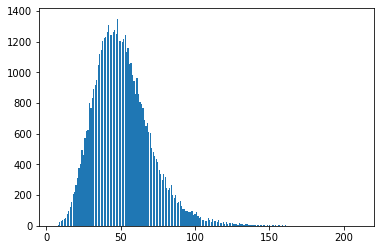

In [6]:
import matplotlib.pyplot as plt

sent_len_distr = sorted(sent_len_distr.items(), key=lambda item: item[0])
print(sent_len_distr)
sen_len = [ele[0] for ele in sent_len_distr]
freq = [ele[1] for ele in sent_len_distr]
plt.bar(sen_len, freq)
plt.show()

In [1]:
train_file = "/data/suidianbo/Set_Rel/data/NYT/raw_NYT/raw_test.json"
with open(train_file) as f:
    lines = f.readlines()
    lines = [eval(ele) for ele in lines]

In [7]:
sent_len_distr = dict()
max_sent_len = 0
for ele in lines:
    text = tokenizer.tokenize(ele["sentText"])
    if len(text)not in sent_len_distr:
        sent_len_distr[len(text)] = 1
    else:
        sent_len_distr[len(text)] = sent_len_distr[len(text)] + 1

print(sent_len_distr)

{46: 125, 27: 93, 32: 95, 31: 106, 24: 71, 7: 4, 64: 60, 49: 100, 45: 107, 60: 64, 66: 47, 35: 124, 43: 133, 26: 77, 71: 23, 52: 93, 54: 91, 47: 127, 9: 4, 33: 108, 50: 84, 79: 12, 70: 34, 41: 108, 55: 93, 99: 3, 42: 134, 23: 47, 44: 119, 69: 41, 30: 90, 59: 85, 58: 78, 36: 125, 65: 49, 21: 51, 39: 125, 56: 89, 63: 46, 62: 65, 76: 31, 20: 40, 53: 84, 57: 67, 38: 115, 74: 18, 22: 55, 18: 35, 29: 112, 19: 39, 83: 16, 77: 22, 48: 100, 51: 98, 34: 115, 25: 74, 95: 6, 16: 23, 75: 25, 88: 7, 37: 112, 40: 125, 85: 9, 28: 83, 68: 41, 104: 7, 72: 22, 80: 20, 91: 10, 73: 26, 67: 42, 6: 1, 98: 4, 13: 13, 61: 40, 78: 23, 101: 3, 81: 14, 87: 9, 90: 4, 14: 14, 82: 12, 12: 10, 86: 7, 102: 3, 17: 23, 84: 4, 15: 22, 89: 5, 115: 2, 94: 8, 11: 11, 113: 4, 103: 3, 112: 1, 100: 2, 93: 5, 107: 3, 96: 3, 97: 2, 106: 1, 130: 1, 118: 1, 109: 2, 105: 2, 92: 6, 122: 1, 132: 1, 10: 4, 120: 1, 111: 1, 135: 2, 136: 2, 124: 1, 117: 1, 8: 2, 108: 2, 121: 1, 114: 1, 126: 1, 137: 1, 5: 1}


[(5, 1), (6, 1), (7, 4), (8, 2), (9, 4), (10, 4), (11, 11), (12, 10), (13, 13), (14, 14), (15, 22), (16, 23), (17, 23), (18, 35), (19, 39), (20, 40), (21, 51), (22, 55), (23, 47), (24, 71), (25, 74), (26, 77), (27, 93), (28, 83), (29, 112), (30, 90), (31, 106), (32, 95), (33, 108), (34, 115), (35, 124), (36, 125), (37, 112), (38, 115), (39, 125), (40, 125), (41, 108), (42, 134), (43, 133), (44, 119), (45, 107), (46, 125), (47, 127), (48, 100), (49, 100), (50, 84), (51, 98), (52, 93), (53, 84), (54, 91), (55, 93), (56, 89), (57, 67), (58, 78), (59, 85), (60, 64), (61, 40), (62, 65), (63, 46), (64, 60), (65, 49), (66, 47), (67, 42), (68, 41), (69, 41), (70, 34), (71, 23), (72, 22), (73, 26), (74, 18), (75, 25), (76, 31), (77, 22), (78, 23), (79, 12), (80, 20), (81, 14), (82, 12), (83, 16), (84, 4), (85, 9), (86, 7), (87, 9), (88, 7), (89, 5), (90, 4), (91, 10), (92, 6), (93, 5), (94, 8), (95, 6), (96, 3), (97, 2), (98, 4), (99, 3), (100, 2), (101, 3), (102, 3), (103, 3), (104, 7), (105, 

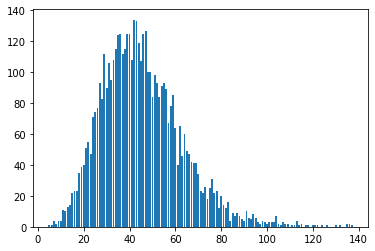

In [8]:
import matplotlib.pyplot as plt

sent_len_distr = sorted(sent_len_distr.items(), key=lambda item: item[0])
print(sent_len_distr)
sen_len = [ele[0] for ele in sent_len_distr]
freq = [ele[1] for ele in sent_len_distr]
plt.bar(sen_len, freq)
plt.show()